# **CLASSIFICAZIONE DIABETE**

In [2]:
# Importing some dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
np.random.seed(314)

In [3]:
#Loading the dataset
train_dataset = pd.read_csv('dataset/diabetes_train.csv')
columns = train_dataset.columns
test_dataset = pd.read_csv('dataset/diabetes_test.csv')

In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   588 non-null    object 
 1   age                      588 non-null    float64
 2   hypertension             588 non-null    int64  
 3   heart_disease            588 non-null    int64  
 4   smoking_history          588 non-null    object 
 5   bmi                      588 non-null    float64
 6   HbA1c_level              588 non-null    float64
 7   blood_glucose_level      588 non-null    float64
 8   Insulin_Sensitivity_Est  477 non-null    float64
 9   BMI_Glucose_Interaction  588 non-null    float64
 10  Random_Lab_Marker        588 non-null    float64
 11  diabetes                 588 non-null    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 55.3+ KB


In [5]:
train_dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
0,Male,64.822537,0,0,never,27.097915,6.517746,157.338059,1.220942,4262.942153,38.820127,1
1,Male,59.912290,1,0,never,33.206670,7.971341,148.625701,0.807652,4932.729931,40.381336,1
2,Male,67.853267,0,0,former,30.639790,8.919297,240.733664,1.225950,7372.749574,55.789060,1
3,Male,57.985607,0,0,never,32.609541,8.759698,154.640163,1.432736,5039.552869,40.877685,1
4,Male,70.278133,0,0,current,37.703827,6.261874,169.415511,0.684205,6267.482417,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Female,19.354174,0,0,former,28.670601,5.248329,160.905601,0.959618,4808.000000,52.632201,0
584,Female,70.000000,0,0,not current,24.750000,3.500000,159.000000,-1.084071,3935.250000,43.652306,0
585,Male,60.000000,0,1,current,29.050000,5.800000,145.000000,-0.468180,4212.250000,58.503956,0
586,Female,27.000000,0,0,No Info,27.320000,6.000000,200.000000,NaN,5464.000000,60.704415,0


In [6]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gender                   148 non-null    object 
 1   age                      148 non-null    float64
 2   hypertension             148 non-null    int64  
 3   heart_disease            148 non-null    int64  
 4   smoking_history          148 non-null    object 
 5   bmi                      148 non-null    float64
 6   HbA1c_level              148 non-null    float64
 7   blood_glucose_level      148 non-null    float64
 8   Insulin_Sensitivity_Est  122 non-null    float64
 9   BMI_Glucose_Interaction  148 non-null    float64
 10  Random_Lab_Marker        148 non-null    float64
 11  diabetes                 148 non-null    int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 14.0+ KB


### **DATA EXPLORATION**

In [7]:
# Do we have any missing values in the train dataset?
train_dataset.replace(to_replace="", value = np.nan, inplace=True)
null_values_train = train_dataset.isnull().sum()
print("Null values in train dataset:", null_values_train)

Null values in train dataset: gender                       0
age                          0
hypertension                 0
heart_disease                0
smoking_history              0
bmi                          0
HbA1c_level                  0
blood_glucose_level          0
Insulin_Sensitivity_Est    111
BMI_Glucose_Interaction      0
Random_Lab_Marker            0
diabetes                     0
dtype: int64


In [8]:
# Do we have any missing values in the test dataset?
test_dataset.replace(to_replace="", value = np.nan, inplace=True)
null_values_test = test_dataset.isnull().sum()
print("Null values in train dataset:", null_values_test)

Null values in train dataset: gender                      0
age                         0
hypertension                0
heart_disease               0
smoking_history             0
bmi                         0
HbA1c_level                 0
blood_glucose_level         0
Insulin_Sensitivity_Est    26
BMI_Glucose_Interaction     0
Random_Lab_Marker           0
diabetes                    0
dtype: int64


In [9]:
# Check if we have any duplicates in the train dataset
duplicates_train = train_dataset.duplicated().sum()
print("Duplicates in train dataset:", duplicates_train)

# Check if we have any duplicates in the test dataset
duplicates_test = test_dataset.duplicated().sum()
print("Duplicates in test dataset:", duplicates_test)

Duplicates in train dataset: 59
Duplicates in test dataset: 5


In [10]:
# We are going to check how many duplicates we have in the train dataset that are diabetic patients
idx = train_dataset.duplicated(keep='first')
idx = train_dataset[idx].index
count = train_dataset.loc[idx, 'diabetes'].sum()
print('Duplicates in train dataset that are diabetic patients:', count)

# We decided to drop the duplicates in the train dataset
train_dataset.drop_duplicates(inplace=True)

Duplicates in train dataset that are diabetic patients: 6


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24348\962787965.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


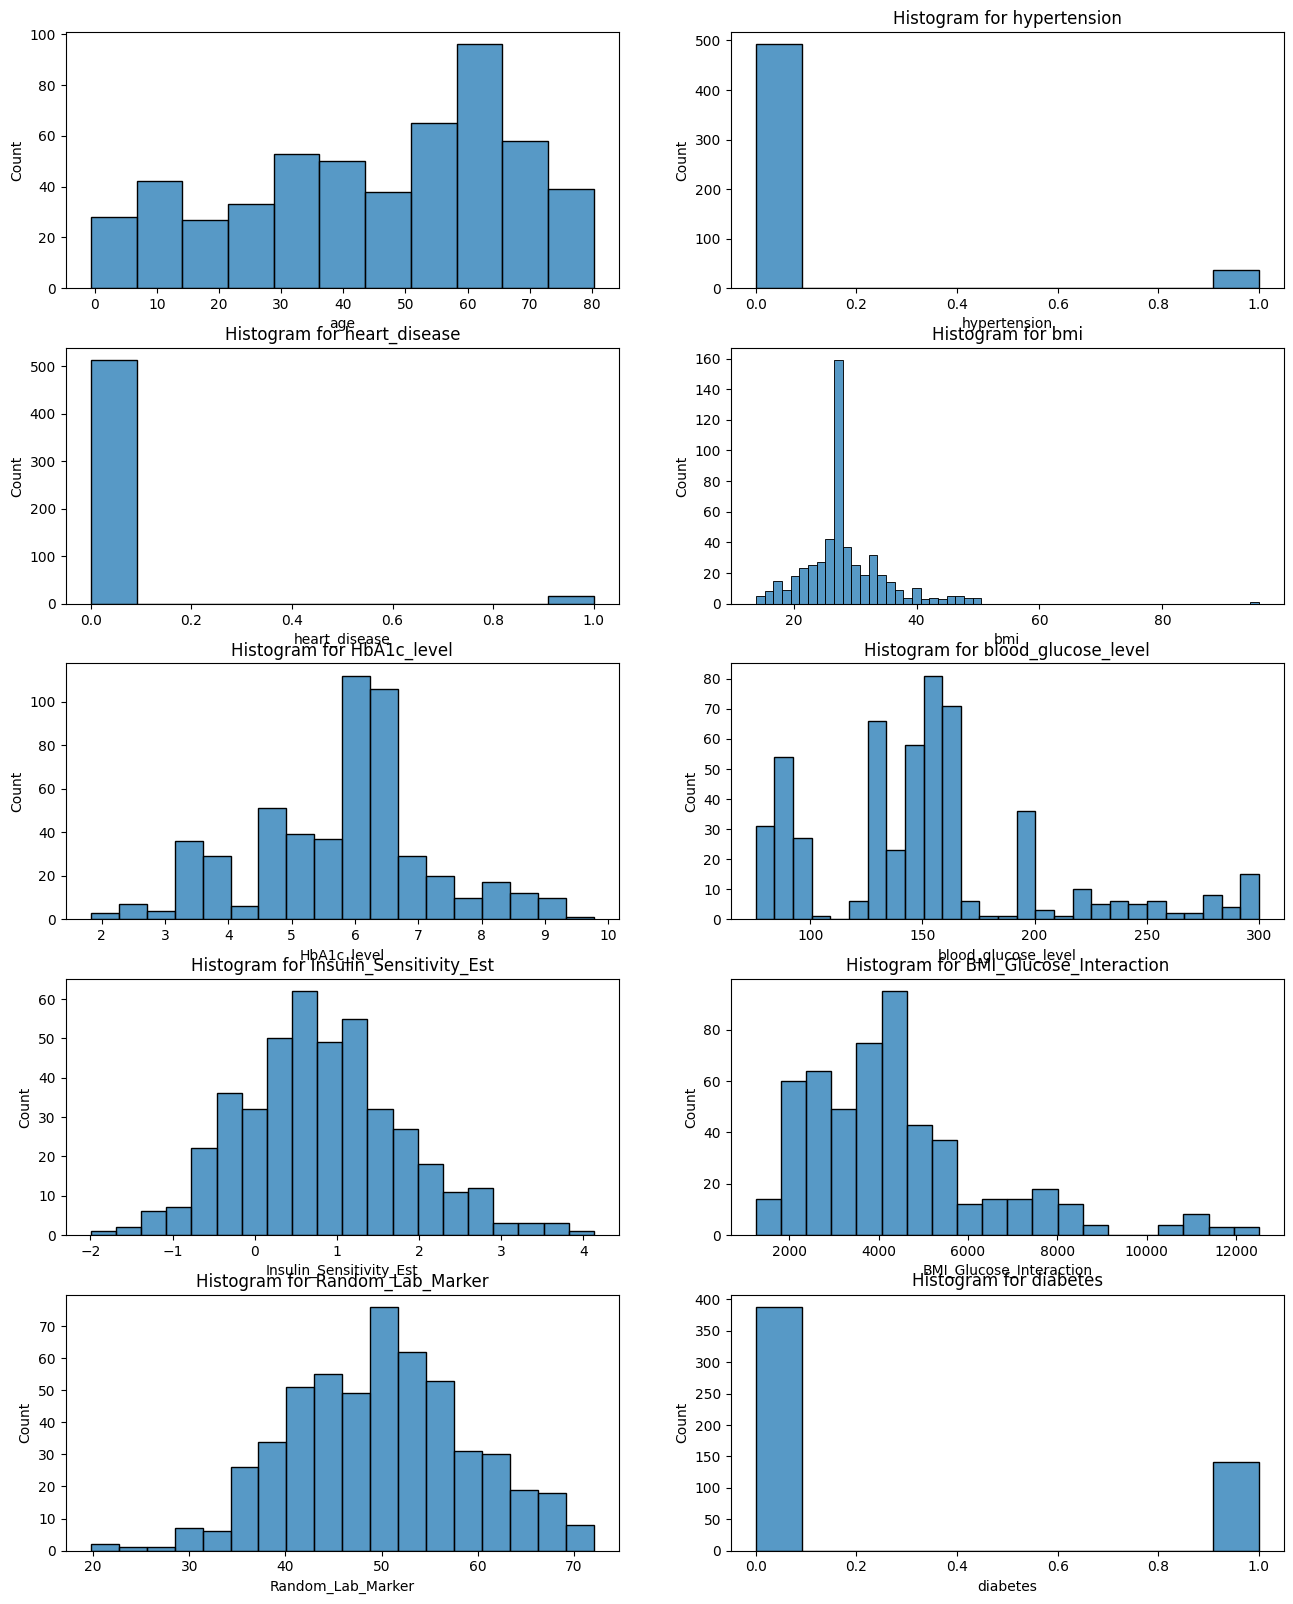

In [11]:
# Displaying 3 boxplots for row
cols_per_row = 2
numerical_columns = train_dataset.columns
numerical_columns = numerical_columns.drop('gender')
numerical_columns = numerical_columns.drop('smoking_history')

rows = (len(numerical_columns) + cols_per_row - 1) // cols_per_row

# Create a grid of boxplots using seaborn
fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 4 * rows), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    if column == 'age':
        sns.histplot(x=train_dataset[column], ax=axes[i])
    else:
        sns.histplot(x=train_dataset[column], ax=axes[i])
        axes[i].set_title(f'Histogram for {column}')
        axes[i].set_xlabel(column)

for i in range(len(numerical_columns), len(axes)):
    axes[i].axis('off')

plt.savefig('output/hist_features.pdf', format='pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()


In [12]:
# How many diabetic patients do we have in the train dataset?
print("Diabetic patients in train dataset:", train_dataset['diabetes'].sum())

Diabetic patients in train dataset: 141


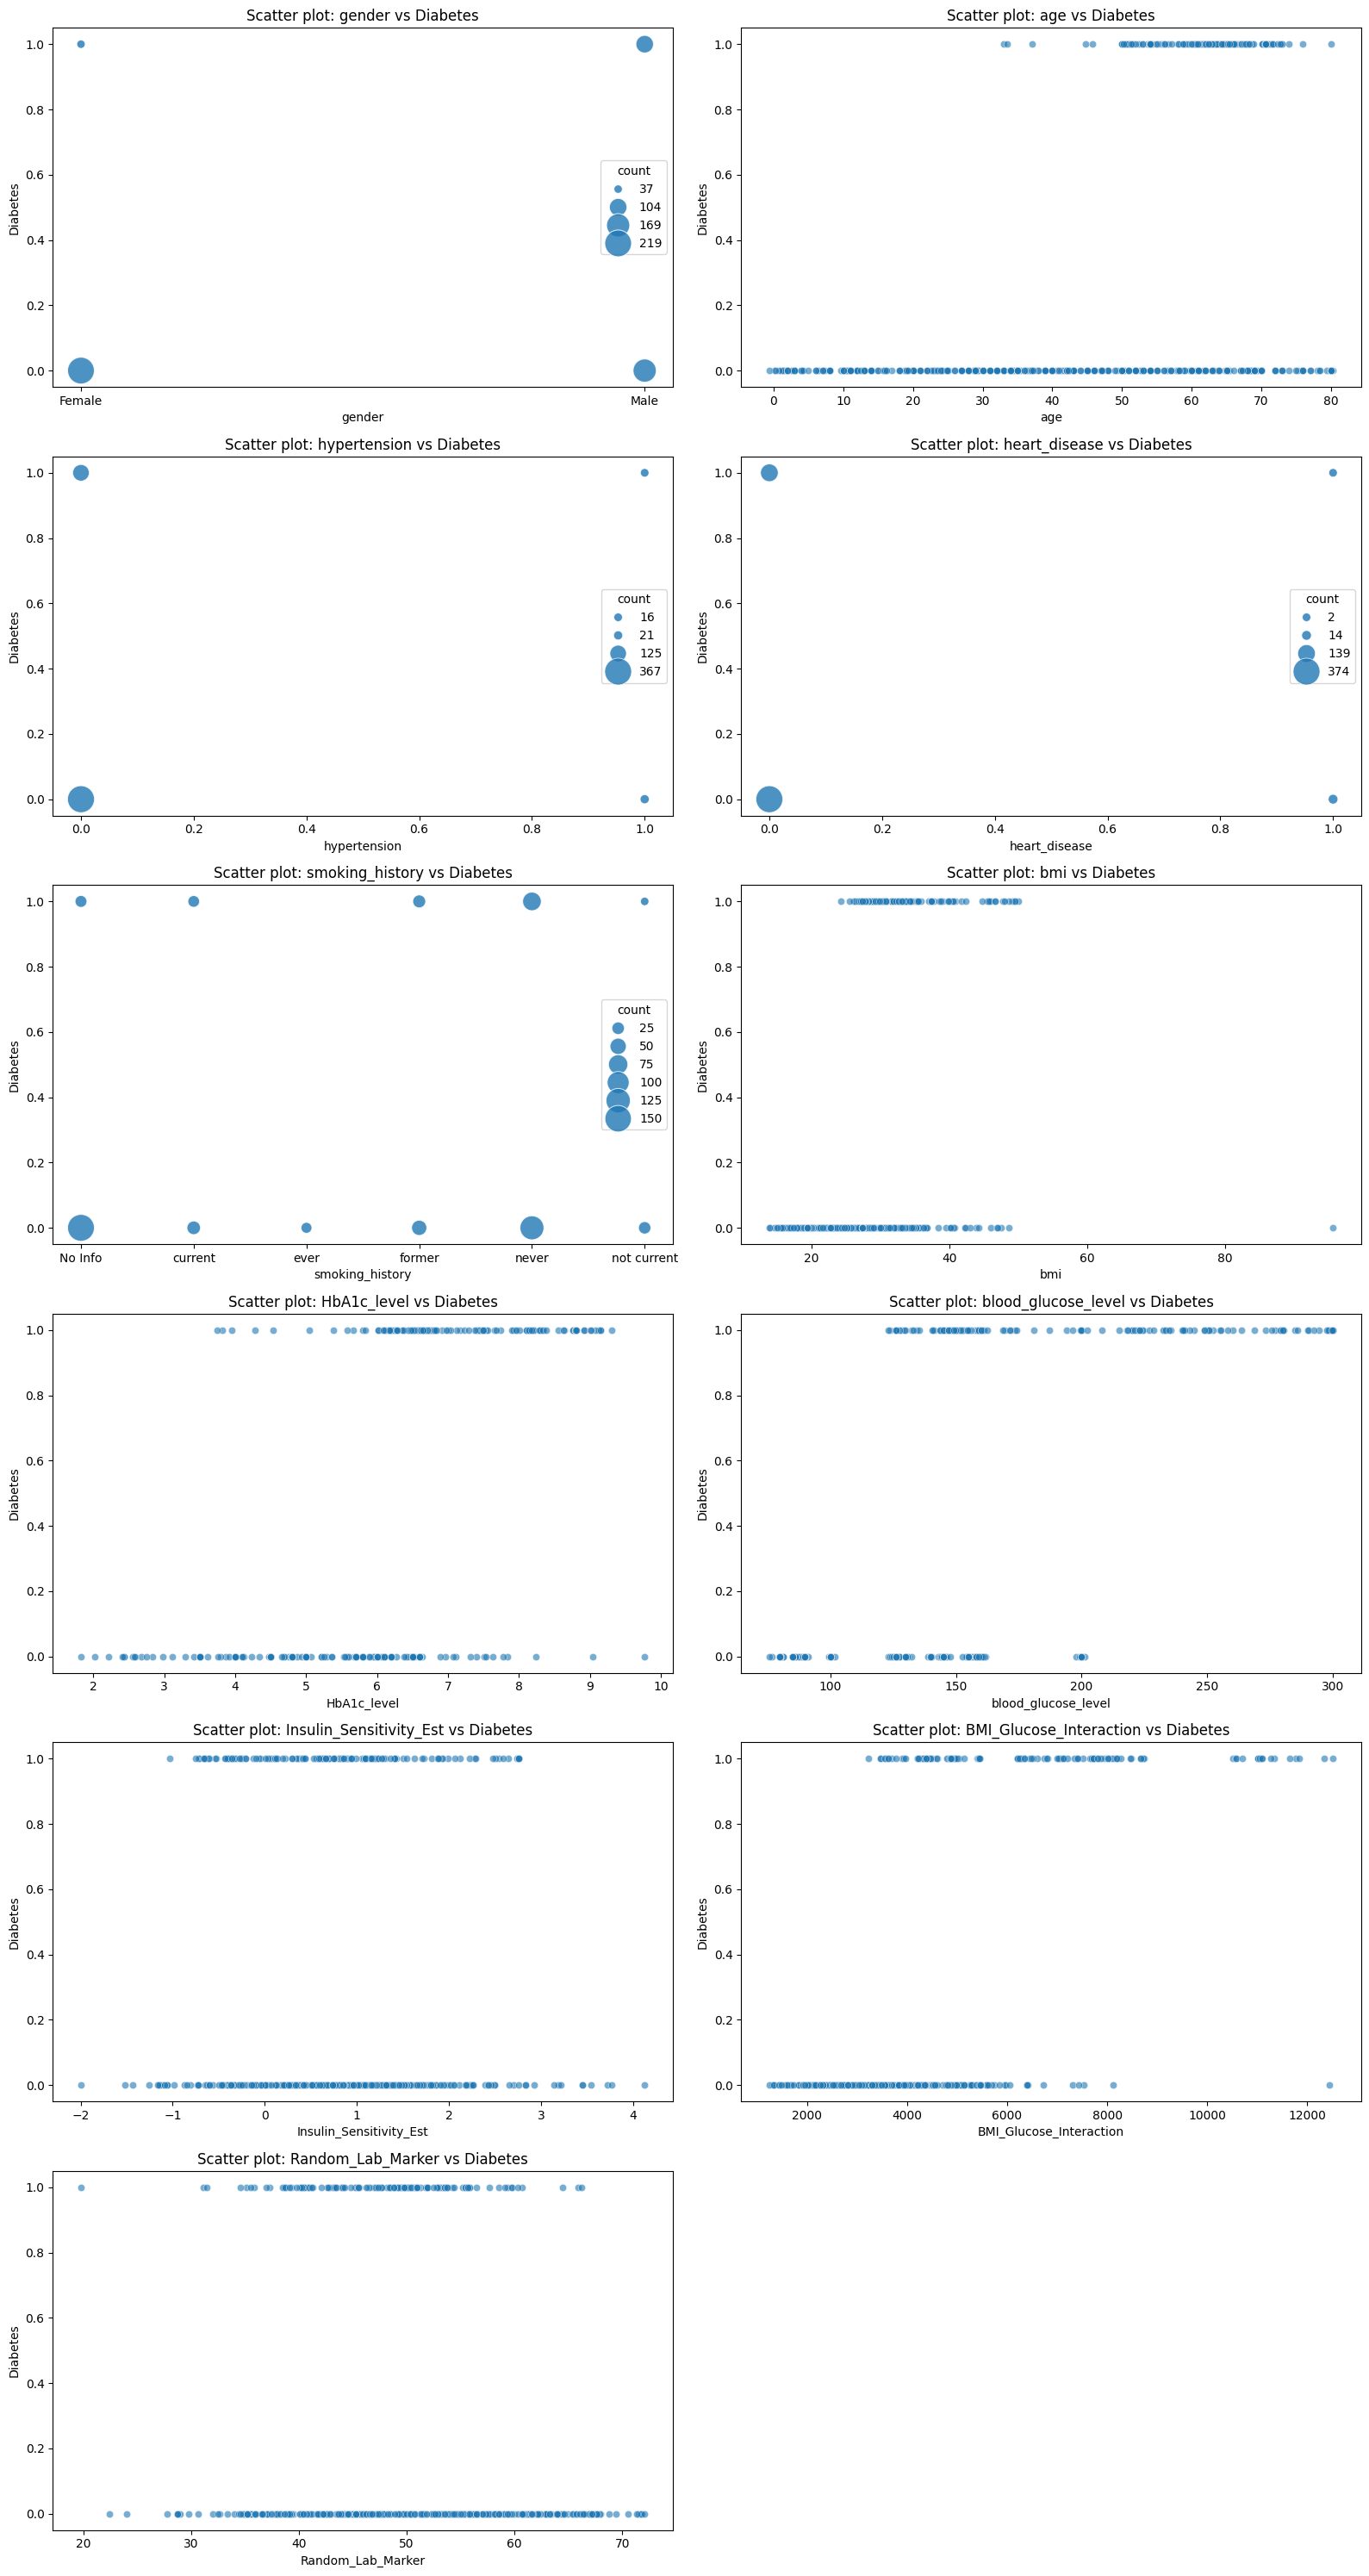

In [13]:
# Creazione di scatter plot per ogni feature rispetto alla variabile 'diabetes'
features = [col for col in train_dataset.columns if col != 'diabetes']
cols_per_row = 2
rows = (len(features) + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 5 * rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    if train_dataset[feature].nunique() <= 6:  # Variabili binarie
        # Raggruppa i dati per contare le istanze
        grouped = train_dataset.groupby([feature, 'diabetes']).size().reset_index(name='count')
        sns.scatterplot(
            data=grouped,
            x=feature,
            y='diabetes',
            size='count',
            sizes=(50, 500),  # Aumenta la dimensione minima e massima dei puntini
            ax=axes[i],
            alpha=0.8  # Aumenta la trasparenza per una migliore sovrapposizione
        )
    else:
        sns.scatterplot(
            data=train_dataset,
            x=feature,
            y='diabetes',
            ax=axes[i],
            alpha=0.6
        )
    axes[i].set_title(f'Scatter plot: {feature} vs Diabetes')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Diabetes')

# Disattiva gli assi vuoti se il numero di grafici è dispari
for i in range(len(features), len(axes)):
    axes[i].axis('off')

plt.savefig('output/features_vs_diabetes.pdf', format='pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()


Da questi istogrammi possiamo fare alcune considerazioni:
1. Risultano delle righe con un età associata negativa, potremmo eliminare quelle righe dal dataset;
2. Risulta un record con un bmi superiore a 80;
3. Essendo che le feature hanno domini molto diversi da loro dovremo effettuare una normalizzazione.

In [14]:
# Displaying the rows of the train dataset with the negative values of 'age'
train_dataset[train_dataset['age'] < 0]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
439,Male,-0.618799,0,0,No Info,26.739199,5.982008,76.886372,0.392354,2185.6,49.634084,0


In [15]:
# Displaying the rows of the train dataset with the high values of 'bmi'
train_dataset[train_dataset['bmi'] > 80]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,BMI_Glucose_Interaction,Random_Lab_Marker,diabetes
520,Male,7.0,0,0,No Info,95.69,6.1,130.0,1.857169,12439.7,54.52723,0


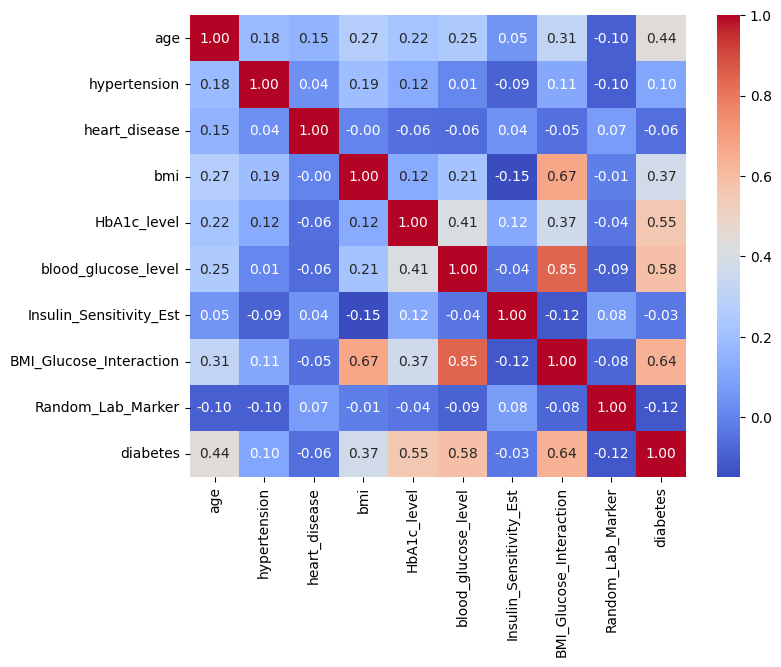

In [16]:
# We can look at the correlation between features
labels = train_dataset.columns
correlation_matrix = train_dataset[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.savefig('output/CorrelationMatrix.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [17]:
# We are dropping the column 'BMI_Glucose_Interaction' because it has a high correlation with 'BMI' and 'glucose'
train_dataset.drop(columns=['BMI_Glucose_Interaction'], inplace=True)
test_dataset.drop(columns=['BMI_Glucose_Interaction'], inplace=True)
columns = train_dataset.columns

### **PRE-PROCESSING**

In [18]:
# Some domain constraints

train_dataset = train_dataset[ 
    (train_dataset['age'] >= 0) &
    (train_dataset['bmi'] >= 0) & (train_dataset['bmi'] < 90) &
    (train_dataset['blood_glucose_level'] >= 0) & 
    (train_dataset['HbA1c_level'] >= 0)
]

test_dataset = test_dataset[
    (test_dataset['age'] >= 0) &
    (test_dataset['bmi'] >= 0) & (test_dataset['bmi'] < 90) &
    (test_dataset['blood_glucose_level'] >= 0) & 
    (test_dataset['HbA1c_level'] >= 0)
]

Innanzitutto, dobbiamo trasformare le variabili categoriche in numeriche. Per farlo abbiamo bisogno di sapere i valori che assumono e come questi sono distribuiti nel dataset di training.

In [19]:
train_dataset['smoking_history'].value_counts()

smoking_history
never          189
No Info        173
former          69
current         51
not current     29
ever            16
Name: count, dtype: int64

In [20]:
train_dataset['gender'].value_counts()

gender
Male      271
Female    256
Name: count, dtype: int64

Il fatto che il dataset di train contenga in maniera bilanciata record per persone di genere femminile e maschile ci porta a pensare che gli errori di classificazione che commetteremo nel test non saranno in maniera lampante a sfavore di una delle due classi in particolare.

In [21]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder_gender = LabelEncoder()
train_dataset['gender'] = label_encoder_gender.fit_transform(train_dataset['gender'])

label_encoder_smoking = {
    "never": 0,
    "No Info": 1,
    "former": 2,
    "not current": 3,
    "ever": 4,
    "current": 5
}

train_dataset["smoking_history"] = train_dataset["smoking_history"].map(label_encoder_smoking)

# Applying the same encoding to the test dataset
test_dataset['gender'] = label_encoder_gender.transform(test_dataset['gender'])
test_dataset["smoking_history"] = test_dataset["smoking_history"].map(label_encoder_smoking)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24348\953669884.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dataset['gender'] = label_encoder_gender.fit_transform(train_dataset['gender'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24348\953669884.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dataset["smoking_history"] = train_dataset["smoking_history"].map(label_encoder_smoking)


In [22]:
train_dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,Random_Lab_Marker,diabetes
0,1,64.822537,0,0,0,27.097915,6.517746,157.338059,1.220942,38.820127,1
1,1,59.912290,1,0,0,33.206670,7.971341,148.625701,0.807652,40.381336,1
2,1,67.853267,0,0,2,30.639790,8.919297,240.733664,1.225950,55.789060,1
3,1,57.985607,0,0,0,32.609541,8.759698,154.640163,1.432736,40.877685,1
4,1,70.278133,0,0,5,37.703827,6.261874,169.415511,0.684205,53.671280,1
...,...,...,...,...,...,...,...,...,...,...,...
583,0,19.354174,0,0,2,28.670601,5.248329,160.905601,0.959618,52.632201,0
584,0,70.000000,0,0,3,24.750000,3.500000,159.000000,-1.084071,43.652306,0
585,1,60.000000,0,1,5,29.050000,5.800000,145.000000,-0.468180,58.503956,0
586,0,27.000000,0,0,1,27.320000,6.000000,200.000000,NaN,60.704415,0


In [23]:
# Normalizing the data in the [0;1] range
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_dataset = scaler.fit_transform(train_dataset)
test_dataset = scaler.transform(test_dataset)

In [24]:
train_dataset = pd.DataFrame(train_dataset, columns=columns)
train_dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,Random_Lab_Marker,diabetes
0,1.0,0.806992,0.0,0.0,0.0,0.365992,0.590557,0.363743,0.525422,0.364301,1.0
1,1.0,0.745787,1.0,0.0,0.0,0.534882,0.773548,0.324886,0.457908,0.394142,1.0
2,1.0,0.844769,0.0,0.0,0.4,0.463915,0.892885,0.735678,0.526240,0.688649,1.0
3,1.0,0.721772,0.0,0.0,0.0,0.518373,0.872793,0.351710,0.560020,0.403630,1.0
4,1.0,0.874994,0.0,0.0,1.0,0.659216,0.558346,0.417607,0.437742,0.648169,1.0
...,...,...,...,...,...,...,...,...,...,...,...
522,0.0,0.240245,0.0,0.0,0.4,0.409472,0.430752,0.379654,0.482733,0.628308,0.0
523,0.0,0.871527,0.0,0.0,0.6,0.301078,0.210658,0.371155,0.148883,0.456664,0.0
524,1.0,0.746880,0.0,1.0,1.0,0.419961,0.500201,0.308716,0.249493,0.740542,0.0
525,0.0,0.335548,0.0,0.0,0.2,0.372132,0.525379,0.554010,NaN,0.782602,0.0


In [25]:
# Replacing the missing values in the training dataset with the mean of the train dataset
from sklearn.impute import SimpleImputer

imputer_ISE = SimpleImputer(strategy='mean')
train_dataset = imputer_ISE.fit_transform(train_dataset)
test_dataset = imputer_ISE.transform(test_dataset)

train_dataset = pd.DataFrame(train_dataset, columns=columns)
train_dataset

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,Random_Lab_Marker,diabetes
0,1.0,0.806992,0.0,0.0,0.0,0.365992,0.590557,0.363743,0.525422,0.364301,1.0
1,1.0,0.745787,1.0,0.0,0.0,0.534882,0.773548,0.324886,0.457908,0.394142,1.0
2,1.0,0.844769,0.0,0.0,0.4,0.463915,0.892885,0.735678,0.526240,0.688649,1.0
3,1.0,0.721772,0.0,0.0,0.0,0.518373,0.872793,0.351710,0.560020,0.403630,1.0
4,1.0,0.874994,0.0,0.0,1.0,0.659216,0.558346,0.417607,0.437742,0.648169,1.0
...,...,...,...,...,...,...,...,...,...,...,...
522,0.0,0.240245,0.0,0.0,0.4,0.409472,0.430752,0.379654,0.482733,0.628308,0.0
523,0.0,0.871527,0.0,0.0,0.6,0.301078,0.210658,0.371155,0.148883,0.456664,0.0
524,1.0,0.746880,0.0,1.0,1.0,0.419961,0.500201,0.308716,0.249493,0.740542,0.0
525,0.0,0.335548,0.0,0.0,0.2,0.372132,0.525379,0.554010,0.458930,0.782602,0.0


In [26]:
test_dataset = pd.DataFrame(test_dataset, columns=columns)
test_dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Insulin_Sensitivity_Est,Random_Lab_Marker,diabetes
0,1.0,0.908921,0.0,0.0,0.4,0.372132,0.877867,1.000000,0.632197,0.614459,1.0
1,0.0,0.681954,0.0,0.0,0.0,0.553666,0.299582,0.256351,0.369193,0.807127,1.0
2,1.0,0.891785,0.0,0.0,0.2,0.372545,0.873352,0.994669,0.640861,0.611949,1.0
3,1.0,0.807459,0.0,0.0,0.0,0.367632,0.588804,0.373685,0.552814,0.457983,1.0
4,0.0,0.681483,0.0,0.0,0.0,0.725193,0.559701,1.000000,0.424150,0.665463,1.0
...,...,...,...,...,...,...,...,...,...,...,...
142,0.0,0.609770,0.0,0.0,0.0,0.359967,0.399491,0.241818,0.458930,0.337801,0.0
143,0.0,0.672093,0.0,0.0,0.0,0.372132,0.487612,0.108021,0.397807,0.718318,0.0
144,0.0,0.460194,0.0,0.0,0.2,0.372132,0.399491,0.286417,0.545919,0.498462,0.0
145,0.0,0.148944,0.0,0.0,0.2,0.370648,0.287214,0.375453,0.222961,0.824775,0.0


#### **TECNICHE DI UPSAMPLING o DOWNSAMPLING**

In [27]:
# @title: PROVA DI RESAMPLE()
'''
# La funzione resample() di imblearn è una funzione che permette di bilanciare un dataset sbilamciato, 
# andando a duplicare dei record della classe meno rappresentata.

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_res, y_Res = ros.fit_resample(train_dataset.drop(columns=['diabetes']), train_dataset['diabetes'])

# ricreo il dataframe di train_dataset
x_res = pd.DataFrame(x_res, columns=columns[:-1])
y_res = pd.DataFrame(y_Res, columns=['diabetes'])
train_dataset = pd.concat([x_res, y_res], axis=1)

print('Duplicates in train dataset:', train_dataset.duplicated().sum())

train_dataset['gender'].value_counts()

# RISULTATO: La rete neurale performa molto meglio (prima faceva schifo perché c'erano pochi record secondo me),
# SV fa ancora un po' schifo
# ATTENZIONE: Sbilancia le classi male/female però
'''

"\n# La funzione resample() di imblearn è una funzione che permette di bilanciare un dataset sbilamciato, \n# andando a duplicare dei record della classe meno rappresentata.\n\nfrom imblearn.over_sampling import RandomOverSampler\n\nros = RandomOverSampler(random_state=42)\nx_res, y_Res = ros.fit_resample(train_dataset.drop(columns=['diabetes']), train_dataset['diabetes'])\n\n# ricreo il dataframe di train_dataset\nx_res = pd.DataFrame(x_res, columns=columns[:-1])\ny_res = pd.DataFrame(y_Res, columns=['diabetes'])\ntrain_dataset = pd.concat([x_res, y_res], axis=1)\n\nprint('Duplicates in train dataset:', train_dataset.duplicated().sum())\n\ntrain_dataset['gender'].value_counts()\n\n# RISULTATO: La rete neurale performa molto meglio (prima faceva schifo perché c'erano pochi record secondo me),\n# SV fa ancora un po' schifo\n# ATTENZIONE: Sbilancia le classi male/female però\n"

In [28]:
# @title : PROVA DI SMOTE()
'''
from imblearn.over_sampling import SMOTE
# La funzione SMOTE() di imblearn è una funzione che permette di bilanciare un dataset sbilamciato, andando
# a generare nuovi record della classe meno rappresentata, interpolando i record esistenti.
# In questo modo non andiamo a duplicare i record ma a generare nuovi record.

smote = SMOTE(random_state=42, sampling_strategy='auto')
x_res, y_res = smote.fit_resample(train_dataset.drop(columns=['diabetes']), train_dataset['diabetes'])

# ricreo il dataframe di train_dataset
x_res = pd.DataFrame(x_res, columns=columns[:-1])
y_res = pd.DataFrame(y_res, columns=['diabetes'])
train_dataset = pd.concat([x_res, y_res], axis=1)

# We have to round the values of some features to the nearest integer
train_dataset['gender'] = train_dataset['gender'].round().astype(int)
train_dataset['hypertension'] = train_dataset['hypertension'].round().astype(int)
train_dataset['heart_disease'] = train_dataset['heart_disease'].round().astype(int)
train_dataset['smoking_history'] = train_dataset['smoking_history'].round().astype(int)

print('Duplicates in train dataset:', train_dataset.duplicated().sum())

train_dataset['gender'].value_counts()

# RISULTATO:  1. L'albero fa più fatica ma ha senso in quanto abbiamo più record
#             2. La rete neurale è più lenta e non performa particolarmente bene
#             3. SV fa schifo
#             4. La RF performa mmolto bene ma è lenta

# ATTENZIONE: Quando genera nuovi record lo fa perturbando i record esistenti, ciò implica che ci ritroveremo
# delle feature binarie che assumono valori continui (es. 0.5)
'''

"\nfrom imblearn.over_sampling import SMOTE\n# La funzione SMOTE() di imblearn è una funzione che permette di bilanciare un dataset sbilamciato, andando\n# a generare nuovi record della classe meno rappresentata, interpolando i record esistenti.\n# In questo modo non andiamo a duplicare i record ma a generare nuovi record.\n\nsmote = SMOTE(random_state=42, sampling_strategy='auto')\nx_res, y_res = smote.fit_resample(train_dataset.drop(columns=['diabetes']), train_dataset['diabetes'])\n\n# ricreo il dataframe di train_dataset\nx_res = pd.DataFrame(x_res, columns=columns[:-1])\ny_res = pd.DataFrame(y_res, columns=['diabetes'])\ntrain_dataset = pd.concat([x_res, y_res], axis=1)\n\n# We have to round the values of some features to the nearest integer\ntrain_dataset['gender'] = train_dataset['gender'].round().astype(int)\ntrain_dataset['hypertension'] = train_dataset['hypertension'].round().astype(int)\ntrain_dataset['heart_disease'] = train_dataset['heart_disease'].round().astype(int)\ntra

In [29]:
# @title: PROVA DI ClusterCentroids
'''
from imblearn.under_sampling import ClusterCentroids

# La funzione ClusterCentroids() di imblearn è una funzione che permette di bilanciare un dataset sbilamciato,
# andando a performare un clustering dei record della classe maggiormente rappresentata.

cc = ClusterCentroids(random_state=42, sampling_strategy='auto')
x_res, y_res = cc.fit_resample(train_dataset.drop(columns=['diabetes']), train_dataset['diabetes'])

# ricreo il dataframe di train_dataset
x_res = pd.DataFrame(x_res, columns=columns[:-1])
y_res = pd.DataFrame(y_res, columns=['diabetes'])
train_dataset = pd.concat([x_res, y_res], axis=1)

# We have to round the values of some features to the nearest integer
train_dataset['gender'] = train_dataset['gender'].round().astype(int)
train_dataset['hypertension'] = train_dataset['hypertension'].round().astype(int)
train_dataset['heart_disease'] = train_dataset['heart_disease'].round().astype(int)
train_dataset['smoking_history'] = train_dataset['smoking_history'].round().astype(int)

print('Duplicates in train dataset:', train_dataset.duplicated().sum())

train_dataset['gender'].value_counts()

# RISULTATI : In generale non otteniamo grandi risultati poiché andiamo a ridurre di troppo il numero di record
# ATTENZIONE : Riducendo il numero di record nel train aumenta il rischio di overfitting
'''

"\nfrom imblearn.under_sampling import ClusterCentroids\n\n# La funzione ClusterCentroids() di imblearn è una funzione che permette di bilanciare un dataset sbilamciato,\n# andando a performare un clustering dei record della classe maggiormente rappresentata.\n\ncc = ClusterCentroids(random_state=42, sampling_strategy='auto')\nx_res, y_res = cc.fit_resample(train_dataset.drop(columns=['diabetes']), train_dataset['diabetes'])\n\n# ricreo il dataframe di train_dataset\nx_res = pd.DataFrame(x_res, columns=columns[:-1])\ny_res = pd.DataFrame(y_res, columns=['diabetes'])\ntrain_dataset = pd.concat([x_res, y_res], axis=1)\n\n# We have to round the values of some features to the nearest integer\ntrain_dataset['gender'] = train_dataset['gender'].round().astype(int)\ntrain_dataset['hypertension'] = train_dataset['hypertension'].round().astype(int)\ntrain_dataset['heart_disease'] = train_dataset['heart_disease'].round().astype(int)\ntrain_dataset['smoking_history'] = train_dataset['smoking_histo

### **MODEL SELECTION**

In [30]:
# Dividing the dataset into features and target variable

train_dataset = train_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

X_train = train_dataset.drop(columns=['diabetes'])
y_train = train_dataset['diabetes']

X_test = test_dataset.drop(columns=['diabetes'])
y_test = test_dataset['diabetes']

K_FOLD = 5

#### **PRINCIPAL COMPONENT ANALYSIS**

PC necessarie,Varianza spiegata
7,0.907331


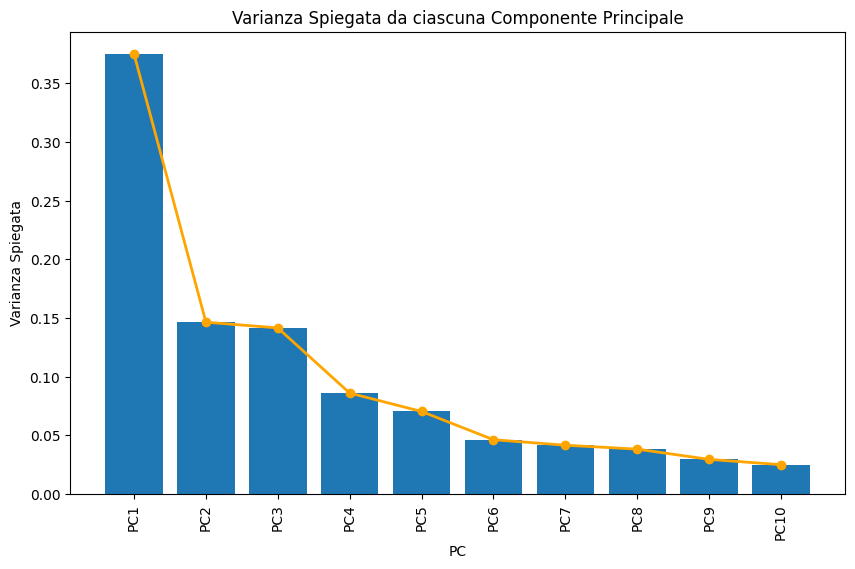

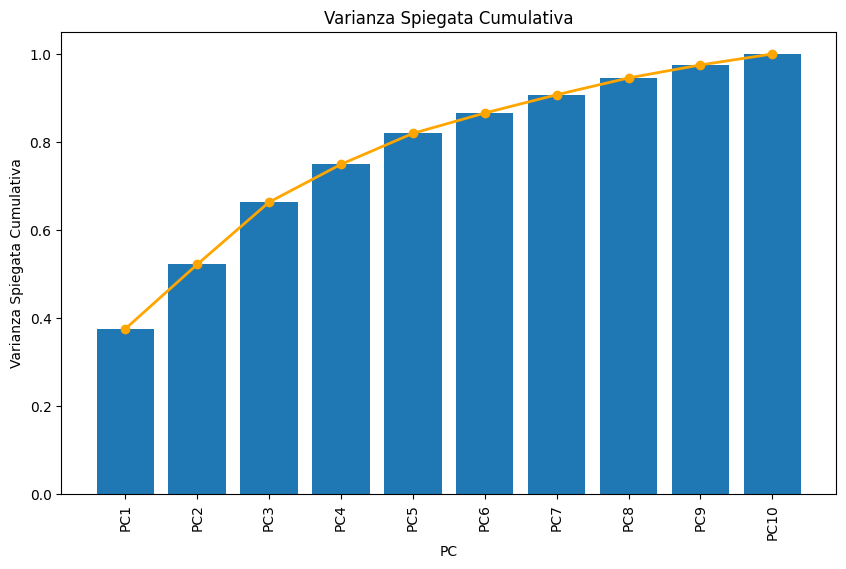

In [31]:
from sklearn.decomposition import PCA


pca=PCA()
pca.fit(X_train)

var_spieg=pca.explained_variance_ratio_
var_spieg_cum= np.cumsum(var_spieg)

num_PC_90 = np.argmax(var_spieg_cum>= 0.9) + 1



#tabella 90% varianza spiegata
results = pd.DataFrame({
    'PC necessarie': [num_PC_90],
    'Varianza spiegata': [var_spieg_cum[num_PC_90-1]]
                        })
display(results.style.hide(axis='index').set_table_styles
        ([{'selector': 'th', 'props': [('background-color', 'lightblue'),('text-align', 'left')]
          }])
        .set_properties(**{'text-align': 'left'})
       )


#grafico varianza spiegata
components = [f'PC{i+1}' for i in range(len(var_spieg))]
plt.figure(figsize=(10, 6))
plt.bar(components, var_spieg)
plt.plot(components, var_spieg, marker='o', color='orange', linestyle='-', linewidth=2, markersize=6)
plt.xlabel('PC')
plt.ylabel('Varianza Spiegata')
plt.title('Varianza Spiegata da ciascuna Componente Principale')
plt.xticks(rotation=90)  
plt.savefig('output/Varianzaspiegata.pdf', format='pdf', bbox_inches='tight')
plt.show()


#grafico varianza spiegata cumulativa
components = [f'PC{i+1}' for i in range(len(var_spieg_cum))]
plt.figure(figsize=(10, 6))
plt.bar(components, var_spieg_cum)
plt.plot(components, var_spieg_cum, marker='o', color='orange', linestyle='-', linewidth=2, markersize=6)
plt.xlabel('PC')
plt.ylabel('Varianza Spiegata Cumulativa')
plt.title('Varianza Spiegata Cumulativa')
plt.xticks(rotation=90) 
plt.savefig('output/varianzaSpiegataCumulativa.pdf', format='pdf', bbox_inches='tight') 
plt.show()


#### **DECISION TREE**

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Creating the model
model_DT = DecisionTreeClassifier(random_state=42)

# Initializing a GridSearchCV object
grid_search_DT = GridSearchCV(
    estimator = model_DT,
    param_grid={
        'criterion': ['gini', 'entropy'],
        'max_depth': [10, 20, 50],
        'min_samples_split': [2, 5, 10],
        'min_impurity_decrease': [0.001, 0.01, 0.1],
    },
    scoring='f1',
    cv=K_FOLD,
    verbose=1,  
    n_jobs=1
)

model_DT = grid_search_DT.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [33]:
results_DT = pd.DataFrame(grid_search_DT.cv_results_)
results_DT = results_DT.sort_values(by='rank_test_score', ascending=True)
results_DT.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.011750,0.003339,0.008858,0.002010,gini,20,0.001,2,"{'criterion': 'gini', 'max_depth': 20, 'min_im...",0.857143,0.949153,0.892857,0.884615,0.862069,0.889167,0.032840,1
18,0.013020,0.006173,0.011979,0.004612,gini,50,0.001,2,"{'criterion': 'gini', 'max_depth': 50, 'min_im...",0.857143,0.949153,0.892857,0.884615,0.862069,0.889167,0.032840,1
19,0.016825,0.001898,0.011302,0.003099,gini,50,0.001,5,"{'criterion': 'gini', 'max_depth': 50, 'min_im...",0.836364,0.949153,0.905660,0.884615,0.862069,0.887572,0.038473,3
10,0.024064,0.020540,0.015275,0.003179,gini,20,0.001,5,"{'criterion': 'gini', 'max_depth': 20, 'min_im...",0.836364,0.949153,0.905660,0.884615,0.862069,0.887572,0.038473,3
12,0.015954,0.005117,0.019494,0.007830,gini,20,0.010,2,"{'criterion': 'gini', 'max_depth': 20, 'min_im...",0.846154,0.872727,0.905660,0.867925,0.925926,0.883678,0.028440,5


In [34]:
# The resultant model is
best_model_DT = grid_search_DT.best_estimator_.fit(X_train, y_train)
y_pred_DT = best_model_DT.predict(X_train)

# We want to print the confusion matrix and the classification report
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix_DT = confusion_matrix(y_train, y_pred_DT)
confusion_matrix_DT = pd.DataFrame(confusion_matrix_DT, index=['Actual No Diabetes', 'Actual Diabetes'], columns=['Predicted No Diabetes', 'Predicted Diabetes'])
print("Confusion Matrix on the train set:\n", confusion_matrix_DT)
print()
print("Classification Report:\n", classification_report(y_train, y_pred_DT))

with open('tables/DT_ConfMatrix_TRAIN.tex','w') as tf:
    tf.write(confusion_matrix_DT.to_latex())

Confusion Matrix on the train set:
                     Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                    385                   1
Actual Diabetes                         0                 141

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       386
         1.0       0.99      1.00      1.00       141

    accuracy                           1.00       527
   macro avg       1.00      1.00      1.00       527
weighted avg       1.00      1.00      1.00       527



In [35]:
confusion_matrix_DT = confusion_matrix(y_test, best_model_DT.predict(X_test))
confusion_matrix_DT = pd.DataFrame(confusion_matrix_DT, index=['Actual No Diabetes', 'Actual Diabetes'], columns=['Predicted No Diabetes', 'Predicted Diabetes'])
print("Confusion Matrix on the test set:\n", confusion_matrix_DT)
print()
print("Classification Report:\n", classification_report(y_test, best_model_DT.predict(X_test)))

with open('tables/DT_ConfMatrix_TEST.tex','w') as tf:
    tf.write(confusion_matrix_DT.to_latex())

Confusion Matrix on the test set:
                     Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                    109                   1
Actual Diabetes                         3                  34

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       110
         1.0       0.97      0.92      0.94        37

    accuracy                           0.97       147
   macro avg       0.97      0.95      0.96       147
weighted avg       0.97      0.97      0.97       147



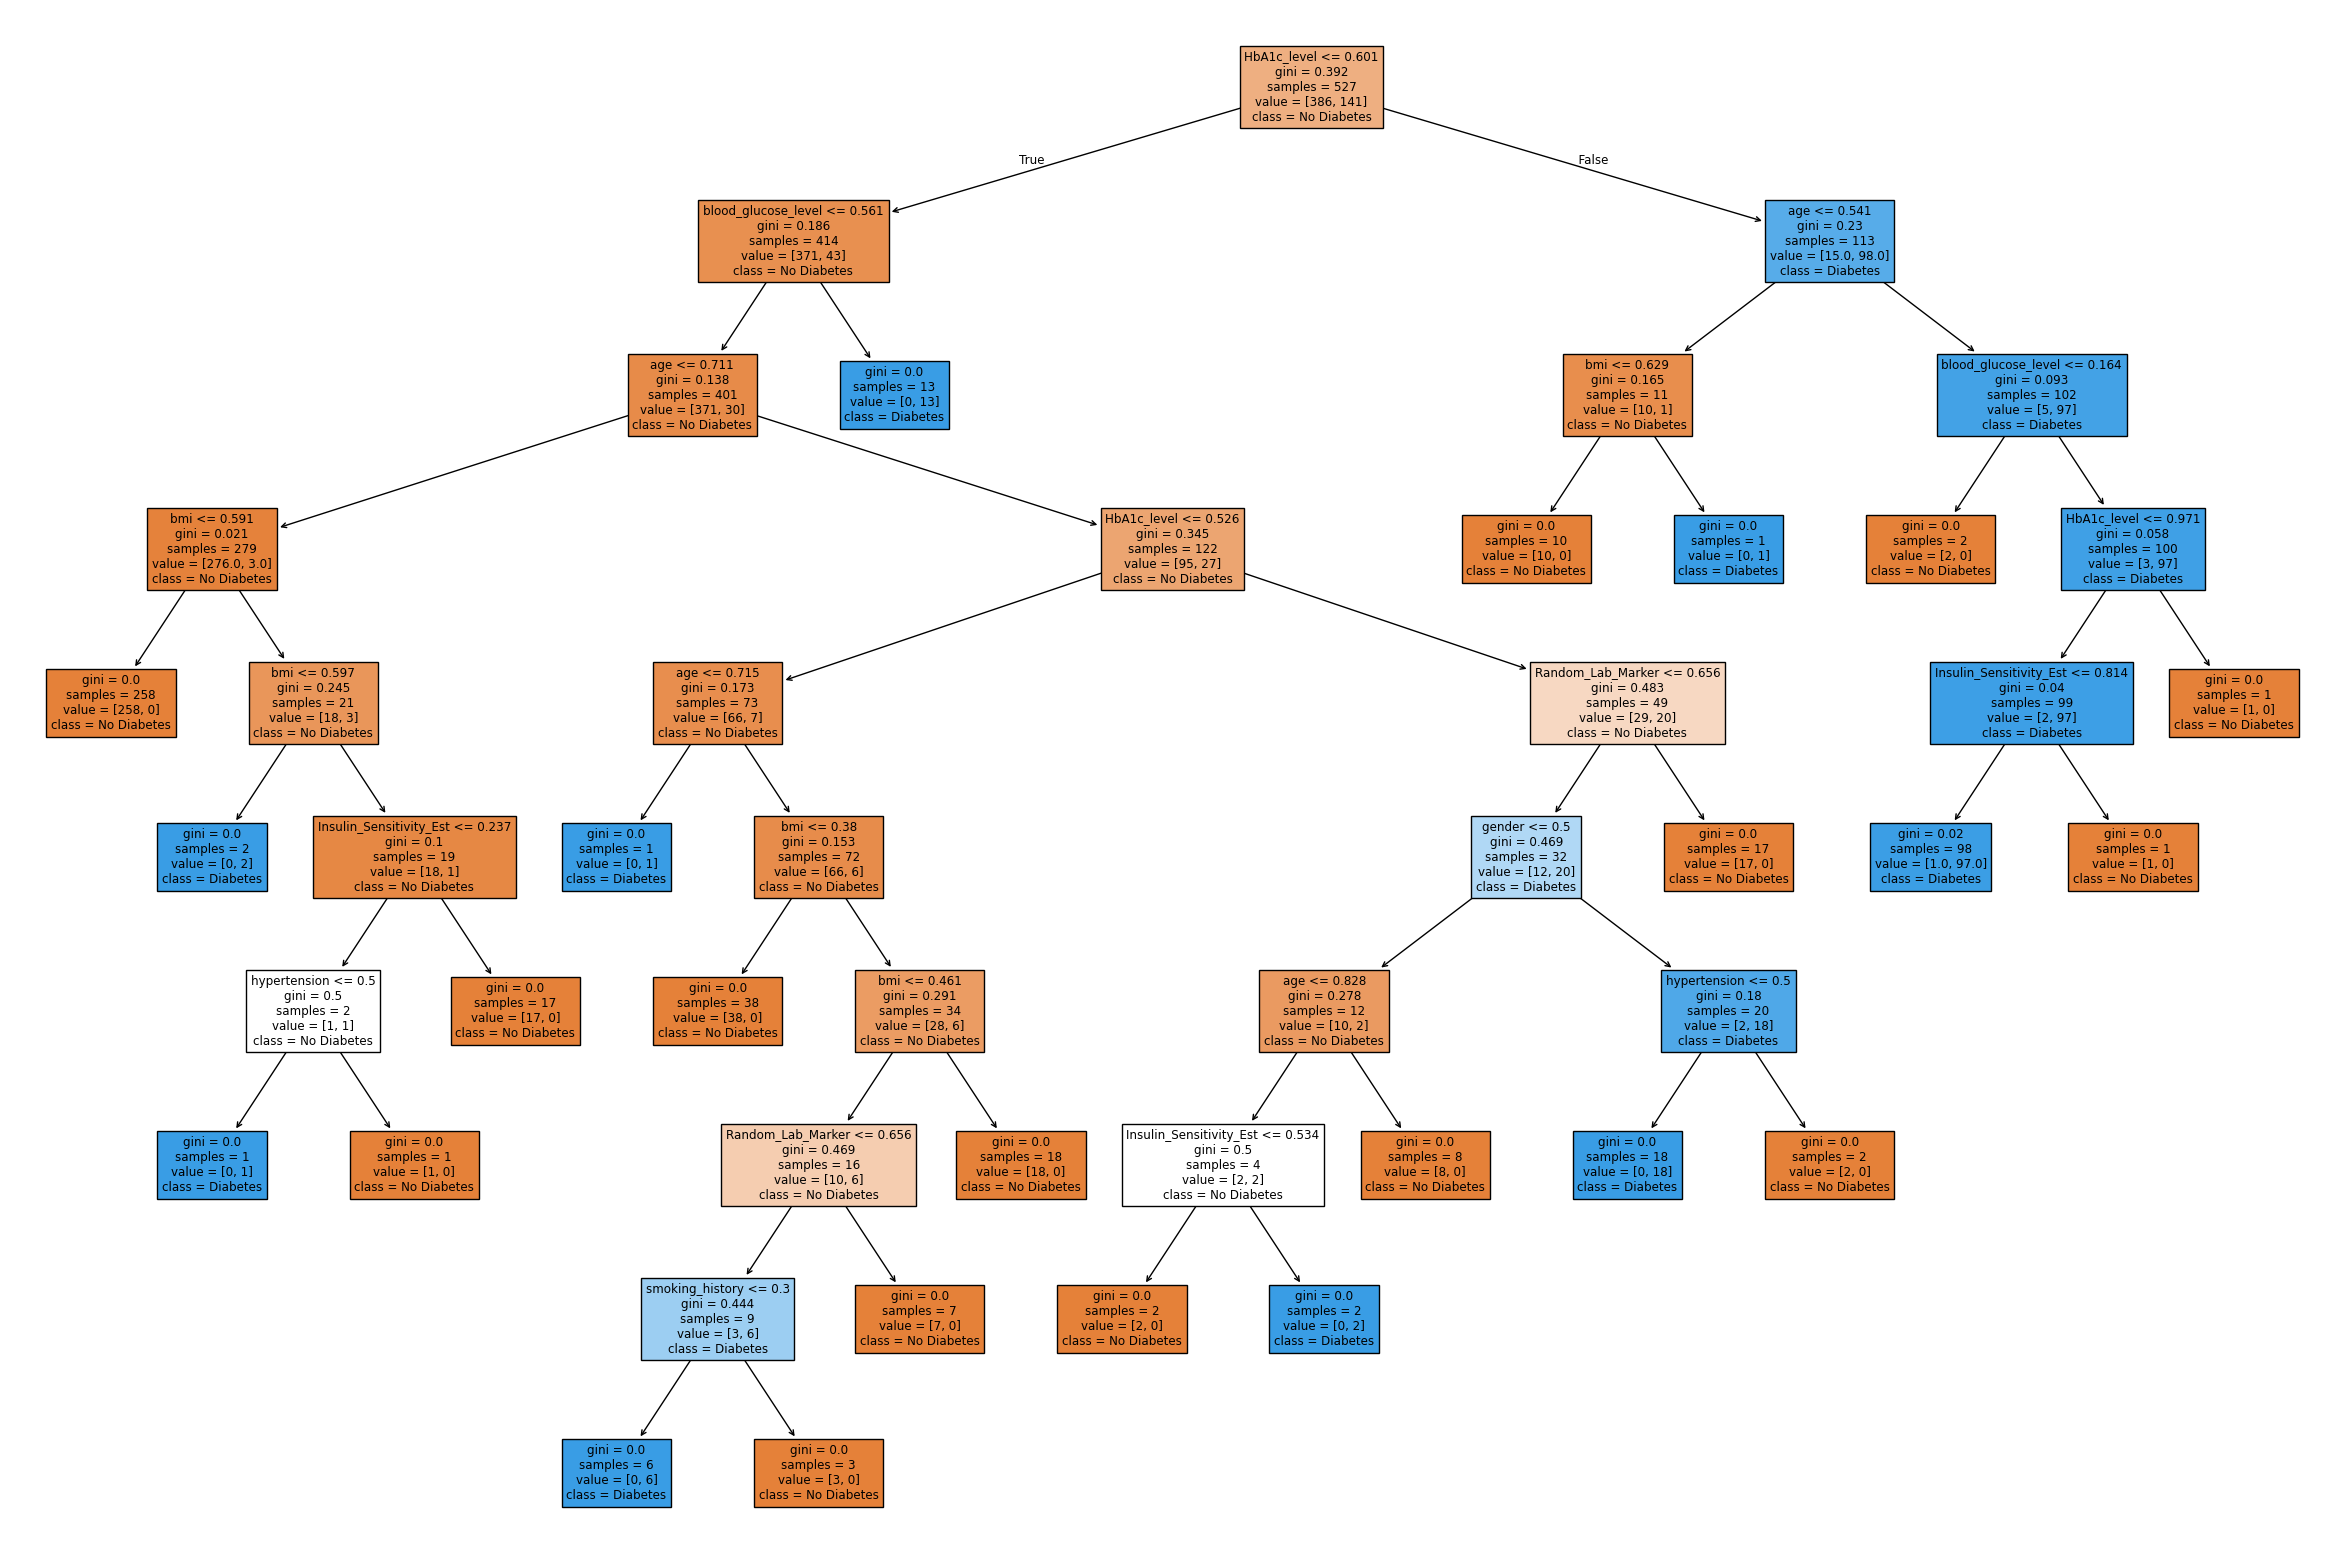

In [36]:
from sklearn.tree import export_text
from sklearn.tree import plot_tree

# Display the structure of the tree as a plot
plt.figure(figsize=(30, 20))
plot_tree(best_model_DT, feature_names=X_train.columns.tolist(), class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.savefig('output/DecisionTree.pdf', format='pdf', bbox_inches='tight')
plt.show()

#### **MLP CLASSIFIER**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Creating the model
model_MLP = MLPClassifier()

# Initializing a GridSearchCV object
grid_search_MLP = GridSearchCV(
    estimator = model_MLP,
    param_grid={
        'hidden_layer_sizes': [(15, 7, 15), (11,15,11), (11,11,11,11,11)],
        'activation': ['relu', 'identity'],
        'max_iter': [3000], 
        'learning_rate' : ['constant', 'adaptive'],
        'solver': ['adam', 'sgd'],
        }  ,   
    scoring='f1',
    cv=K_FOLD,
    verbose=1,  
    n_jobs=1
)

model_MLP = grid_search_MLP.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
results_MLP = pd.DataFrame(grid_search_MLP.cv_results_)
results_MLP = results_MLP.sort_values(by='rank_test_score', ascending=True)
results_MLP.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.648650,0.169473,0.006861,0.005870,identity,"(15, 7, 15)",adaptive,3000,adam,"{'activation': 'identity', 'hidden_layer_sizes...",0.931034,0.881356,0.920635,0.983051,0.912281,0.925671,0.033135,1
0,2.149576,0.434522,0.014434,0.002185,relu,"(15, 7, 15)",constant,3000,adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.931034,0.896552,0.906250,0.966667,0.885246,0.917150,0.029002,2
4,1.792925,0.498338,0.005246,0.004302,relu,"(11, 15, 11)",constant,3000,adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.909091,0.881356,0.937500,0.949153,0.900000,0.915420,0.024753,3
17,1.852205,0.776666,0.009950,0.005363,identity,"(11, 15, 11)",constant,3000,sgd,"{'activation': 'identity', 'hidden_layer_sizes...",0.928571,0.881356,0.920635,0.950820,0.881356,0.912548,0.027323,4
2,1.734676,0.478428,0.020883,0.013899,relu,"(15, 7, 15)",adaptive,3000,adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",0.931034,0.900000,0.885246,0.933333,0.903226,0.910568,0.018676,5


In [ ]:
# The resultant model is
best_model_MLP = grid_search_MLP.best_estimator_.fit(X_train, y_train)
y_pred_MLP = best_model_MLP.predict(X_train)

# We want to print the confusion matrix and the classification report
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix_MLP = confusion_matrix(y_train, y_pred_MLP)
confusion_matrix_MLP = pd.DataFrame(confusion_matrix_MLP, index=['Actual No Diabetes', 'Actual Diabetes'], columns=['Predicted No Diabetes', 'Predicted Diabetes'])
print("Confusion Matrix on the train set:\n", confusion_matrix_MLP)
print()
print("Classification Report:\n", classification_report(y_train, y_pred_MLP))

with open('tables/MLP_ConfMatrix_TRAIN.tex','w') as tf:
    tf.write(confusion_matrix_MLP.to_latex())

Confusion Matrix on the train set:
                     Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                    134                  13
Actual Diabetes                        10                 137

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       147
         1.0       0.91      0.93      0.92       147

    accuracy                           0.92       294
   macro avg       0.92      0.92      0.92       294
weighted avg       0.92      0.92      0.92       294



In [ ]:
confusion_matrix_MLP = confusion_matrix(y_test, best_model_MLP.predict(X_test))
confusion_matrix_MLP = pd.DataFrame(confusion_matrix_MLP, index=['Actual No Diabetes', 'Actual Diabetes'], columns=['Predicted No Diabetes', 'Predicted Diabetes'])
print("Confusion Matrix on the test set:\n", confusion_matrix_MLP)
print()
print("Classification Report:\n", classification_report(y_test, best_model_MLP.predict(X_test)))

with open('tables/MLP_ConfMatrix_TEST.tex','w') as tf:
    tf.write(confusion_matrix_MLP.to_latex())

Confusion Matrix on the test set:
                     Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                     99                  11
Actual Diabetes                         6                  31

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       110
         1.0       0.74      0.84      0.78        37

    accuracy                           0.88       147
   macro avg       0.84      0.87      0.85       147
weighted avg       0.89      0.88      0.89       147



#### **SUPPORT VECTOR MACHINE CLASSIFIER**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Creating the model
model_SVC = SVC()

# Initializing a GridSearchCV object
grid_search_SVC = GridSearchCV(
    estimator = model_SVC,
    param_grid={
        'kernel': ['linear', 'rbf', 'sigmoid'],
        'C' : [0.01, 0.2, 2, 10],
        'gamma' : ['auto', 0.01, 1/30],
        }  ,   
    scoring='f1',
    cv=K_FOLD,
    verbose=1,  
    n_jobs=1
)

model_SVC = grid_search_SVC.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
results_SVC = pd.DataFrame(grid_search_SVC.cv_results_)
results_SVC = results_SVC.sort_values(by='rank_test_score', ascending=True)
results_SVC.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,0.010889,0.005307,0.013356,0.003829,10.0,auto,linear,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",0.945455,0.881356,0.881356,0.918033,0.931034,0.911447,0.026056,1
30,0.006103,0.006039,0.012599,0.006331,10.0,0.01,linear,"{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}",0.945455,0.881356,0.881356,0.918033,0.931034,0.911447,0.026056,1
33,0.007752,0.001342,0.007771,0.001910,10.0,0.033333,linear,"{'C': 10, 'gamma': 0.03333333333333333, 'kerne...",0.945455,0.881356,0.881356,0.918033,0.931034,0.911447,0.026056,1
28,0.010853,0.003200,0.013492,0.002913,10.0,auto,rbf,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.964286,0.881356,0.847458,0.920635,0.931034,0.908954,0.040569,4
21,0.008316,0.002358,0.007818,0.001798,2.0,0.01,linear,"{'C': 2, 'gamma': 0.01, 'kernel': 'linear'}",0.964286,0.896552,0.862069,0.920635,0.900000,0.908708,0.033556,5


In [ ]:
# The resultant model is
best_model_SVC = grid_search_SVC.best_estimator_.fit(X_train, y_train)
y_pred_SVC = best_model_SVC.predict(X_train)

# We want to print the confusion matrix and the classification report
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix_SVC = confusion_matrix(y_train, y_pred_SVC)
confusion_matrix_SVC = pd.DataFrame(confusion_matrix_SVC, index=['Actual No Diabetes', 'Actual Diabetes'], columns=['Predicted No Diabetes', 'Predicted Diabetes'])
print("Confusion Matrix on the train set:\n", confusion_matrix_SVC)
print()
print("Classification Report:\n", classification_report(y_train, y_pred_SVC))

with open('tables/SVC_ConfMatrix_TRAIN.tex','w') as tf:
    tf.write(confusion_matrix_SVC.to_latex())

Confusion Matrix on the train set:
                     Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                    137                  10
Actual Diabetes                         9                 138

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       147
         1.0       0.93      0.94      0.94       147

    accuracy                           0.94       294
   macro avg       0.94      0.94      0.94       294
weighted avg       0.94      0.94      0.94       294



In [ ]:
confusion_matrix_SVC = confusion_matrix(y_test, best_model_SVC.predict(X_test))
confusion_matrix_SVC = pd.DataFrame(confusion_matrix_SVC, index=['Actual No Diabetes', 'Actual Diabetes'], columns=['Predicted No Diabetes', 'Predicted Diabetes'])
print("Confusion Matrix on the test set:\n", confusion_matrix_SVC)
print()
print("Classification Report:\n", classification_report(y_test, best_model_SVC.predict(X_test)))

with open('tables/SVC_ConfMatrix_TEST.tex','w') as tf:
    tf.write(confusion_matrix_SVC.to_latex())

Confusion Matrix on the test set:
                     Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                    100                  10
Actual Diabetes                         6                  31

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.91      0.93       110
         1.0       0.76      0.84      0.79        37

    accuracy                           0.89       147
   macro avg       0.85      0.87      0.86       147
weighted avg       0.90      0.89      0.89       147



#### **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Creating the model
model_RF = RandomForestClassifier()

# Initializing a GridSearchCV object
grid_search_RF = GridSearchCV(
    estimator = model_RF,
    param_grid={
        'n_estimators': [50, 100],
        'max_depth': [10, 20, 50],
        'min_samples_split': [2, 5, 10],
        'min_impurity_decrease': [0.01, 0.1, 0],
        
        }  ,   
    scoring='f1',
    cv=K_FOLD,
    verbose=1,  
    n_jobs=1
)

model_RF = grid_search_RF.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [ ]:
results_RF = pd.DataFrame(grid_search_RF.cv_results_)
results_RF = results_RF.sort_values(by='rank_test_score', ascending=True)
results_RF.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_impurity_decrease,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.282354,0.007181,0.018433,0.004117,10,0.0,5,100,"{'max_depth': 10, 'min_impurity_decrease': 0, ...",0.964286,0.928571,0.965517,0.949153,0.912281,0.943962,0.020713,1
49,0.505501,0.136166,0.022201,0.012355,50,0.0,2,100,"{'max_depth': 50, 'min_impurity_decrease': 0, ...",0.947368,0.928571,0.965517,0.949153,0.912281,0.940578,0.018366,2
30,0.290632,0.112994,0.018144,0.007179,20,0.0,2,50,"{'max_depth': 20, 'min_impurity_decrease': 0, ...",0.945455,0.928571,0.965517,0.949153,0.912281,0.940195,0.018240,3
12,0.251760,0.033537,0.023396,0.008389,10,0.0,2,50,"{'max_depth': 10, 'min_impurity_decrease': 0, ...",0.964286,0.896552,0.965517,0.950820,0.912281,0.937891,0.028255,4
50,0.305124,0.086272,0.016355,0.006766,50,0.0,5,50,"{'max_depth': 50, 'min_impurity_decrease': 0, ...",0.947368,0.928571,0.965517,0.933333,0.912281,0.937414,0.017974,5


In [ ]:
# The resultant model is
best_model_RF = grid_search_RF.best_estimator_.fit(X_train, y_train)
y_pred_RF = best_model_RF.predict(X_train)

# We want to print the confusion matrix and the classification report
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix_RF = confusion_matrix(y_train, y_pred_RF)
confusion_matrix_RF = pd.DataFrame(confusion_matrix_RF, index=['Actual No Diabetes', 'Actual Diabetes'], columns=['Predicted No Diabetes', 'Predicted Diabetes'])
print("Confusion Matrix on the train set:\n", confusion_matrix_RF)
print()
print("Classification Report:\n", classification_report(y_train, y_pred_RF))

with open('tables/RF_ConfMatrix_TRAIN.tex','w') as tf:
    tf.write(confusion_matrix_RF.to_latex())

Confusion Matrix on the train set:
                     Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                    147                   0
Actual Diabetes                         0                 147

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       147
         1.0       1.00      1.00      1.00       147

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [ ]:
confusion_matrix_RF = confusion_matrix(y_test, best_model_RF.predict(X_test))
confusion_matrix_RF = pd.DataFrame(confusion_matrix_RF, index=['Actual No Diabetes', 'Actual Diabetes'], columns=['Predicted No Diabetes', 'Predicted Diabetes'])
print("Confusion Matrix on the test set:\n", confusion_matrix_RF)
print()
print("Classification Report:\n", classification_report(y_test, best_model_RF.predict(X_test)))

with open('tables/RF_ConfMatrix_TEST.tex','w') as tf:
    tf.write(confusion_matrix_RF.to_latex())

Confusion Matrix on the test set:
                     Predicted No Diabetes  Predicted Diabetes
Actual No Diabetes                    107                   3
Actual Diabetes                         3                  34

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       110
         1.0       0.92      0.92      0.92        37

    accuracy                           0.96       147
   macro avg       0.95      0.95      0.95       147
weighted avg       0.96      0.96      0.96       147

